In [1]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Hands and Drawing utilities
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

def main():
    # Start capturing video from the webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Initialize MediaPipe Hands
    with mp_hands.Hands(static_image_mode=False,
                        max_num_hands=2,
                        min_detection_confidence=0.7,
                        min_tracking_confidence=0.7) as hands:

        while True:
            # Read a frame from the camera
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not read frame.")
                break

            # Convert the frame to RGB (MediaPipe expects RGB images)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Process the frame and detect hands
            results = hands.process(frame_rgb)

            # Annotate the hands on the frame
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    # Draw hand landmarks and connections
                    mp_drawing.draw_landmarks(
                        frame, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                        mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2))

            # Display the annotated frame
            cv2.imshow('Hand Pose Detection', frame)

            # Break the loop on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    # Release the video capture object and close windows
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


In [1]:
import cv2
import mediapipe as mp
import os

# Initialize MediaPipe Hands and Drawing utilities
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Directory to save gesture images
SAVE_DIR = "gesture_images"
os.makedirs(SAVE_DIR, exist_ok=True)

def main():
    # Start capturing video from the webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Initialize MediaPipe Hands
    with mp_hands.Hands(static_image_mode=False,
                        max_num_hands=2,
                        min_detection_confidence=0.7,
                        min_tracking_confidence=0.7) as hands:

        frame_count = 0  # Counter for saved images

        while True:
            # Read a frame from the camera
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not read frame.")
                break

            # Convert the frame to RGB (MediaPipe expects RGB images)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Process the frame and detect hands
            results = hands.process(frame_rgb)

            # Annotate the hands on the frame
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    # Get hand landmark coordinates
                    h, w, _ = frame.shape
                    x_min, y_min = w, h
                    x_max, y_max = 0, 0

                    for landmark in hand_landmarks.landmark:
                        x, y = int(landmark.x * w), int(landmark.y * h)
                        x_min, y_min = min(x_min, x), min(y_min, y)
                        x_max, y_max = max(x_max, x), max(y_max, y)

                    # Add some padding to the bounding box
                    padding = 20
                    x_min = max(x_min - padding, 0)
                    y_min = max(y_min - padding, 0)
                    x_max = min(x_max + padding, w)
                    y_max = min(y_max + padding, h)

                    # Crop the hand region from the frame
                    hand_region = frame[y_min:y_max, x_min:x_max]

                    # Save the cropped hand region
                    save_path = os.path.join(SAVE_DIR, f"gesture_{frame_count:04d}.jpg")
                    cv2.imwrite(save_path, hand_region)
                    print(f"Saved: {save_path}")
                    frame_count += 1

                    # Draw bounding box and landmarks on the frame
                    cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    mp_drawing.draw_landmarks(
                        frame, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                        mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2))

            # Display the annotated frame
            cv2.imshow('Hand Pose Detection', frame)

            # Break the loop on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    # Release the video capture object and close windows
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


ImportError: cannot import name 'builder' from 'google.protobuf.internal' (c:\Users\soume\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\internal\__init__.py)

In [6]:
import tensorflow as tf
import protobuf

print("TensorFlow version:", tf.__version__)
print("Protobuf version:", protobuf.__version__)


ModuleNotFoundError: No module named 'protobuf'

Training the initial model...
Epoch 1/20
44/44 [==============================] - 9s 145ms/step - loss: 0.9918 - accuracy: 0.6960 - val_loss: 0.2842 - val_accuracy: 0.8920 - lr: 0.0010
Epoch 2/20
44/44 [==============================] - 5s 121ms/step - loss: 0.3192 - accuracy: 0.8942 - val_loss: 0.1257 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 3/20
44/44 [==============================] - 5s 120ms/step - loss: 0.1960 - accuracy: 0.9368 - val_loss: 0.1164 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 4/20
44/44 [==============================] - 5s 122ms/step - loss: 0.1620 - accuracy: 0.9467 - val_loss: 0.0910 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 5/20
44/44 [==============================] - 5s 123ms/step - loss: 0.1438 - accuracy: 0.9510 - val_loss: 0.0881 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 6/20
44/44 [==============================] - 5s 123ms/step - loss: 0.1049 - accuracy: 0.9695 - val_loss: 0.0662 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 7/20
44/44 [======================

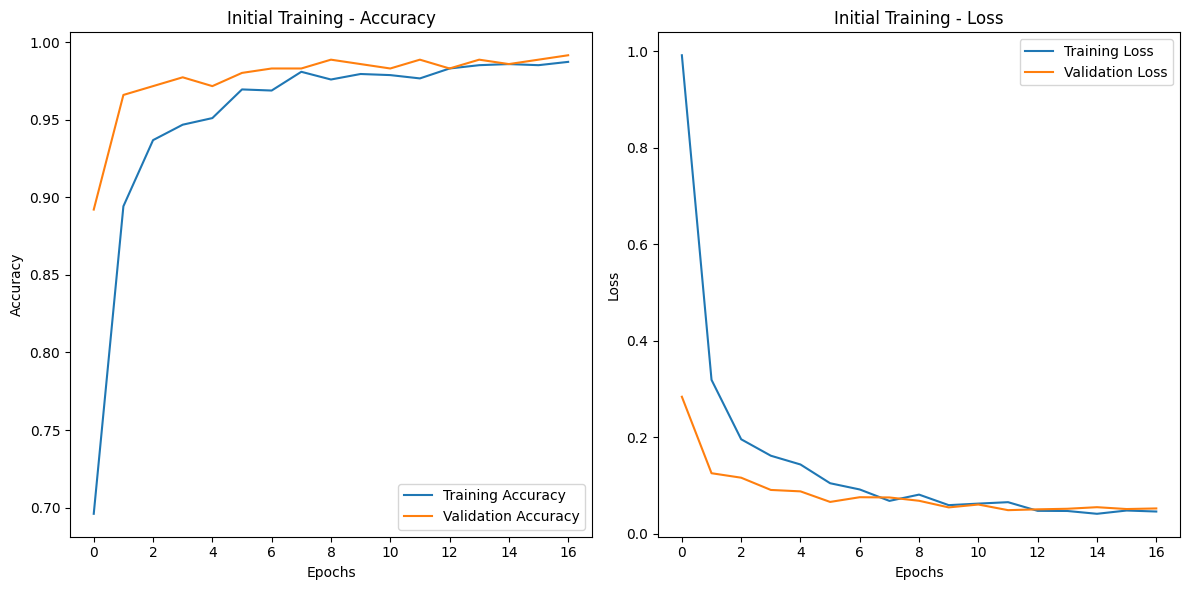


Fine-tuning the model...
Epoch 1/10
44/44 [==============================] - 23s 400ms/step - loss: 3.3557 - accuracy: 0.3317 - val_loss: 0.0442 - val_accuracy: 0.9858 - lr: 1.0000e-05
Epoch 2/10
44/44 [==============================] - 17s 382ms/step - loss: 2.6226 - accuracy: 0.4183 - val_loss: 0.0445 - val_accuracy: 0.9886 - lr: 1.0000e-05
Epoch 3/10
44/44 [==============================] - 17s 379ms/step - loss: 2.1067 - accuracy: 0.5121 - val_loss: 0.0459 - val_accuracy: 0.9886 - lr: 1.0000e-05
Epoch 4/10
44/44 [==============================] - 17s 374ms/step - loss: 1.8027 - accuracy: 0.5540 - val_loss: 0.0554 - val_accuracy: 0.9858 - lr: 1.0000e-05
Epoch 5/10
44/44 [==============================] - 17s 379ms/step - loss: 1.6331 - accuracy: 0.5788 - val_loss: 0.0685 - val_accuracy: 0.9830 - lr: 5.0000e-06
Epoch 6/10
44/44 [==============================] - 17s 383ms/step - loss: 1.4982 - accuracy: 0.5902 - val_loss: 0.0829 - val_accuracy: 0.9773 - lr: 5.0000e-06
Fine-tuned mod

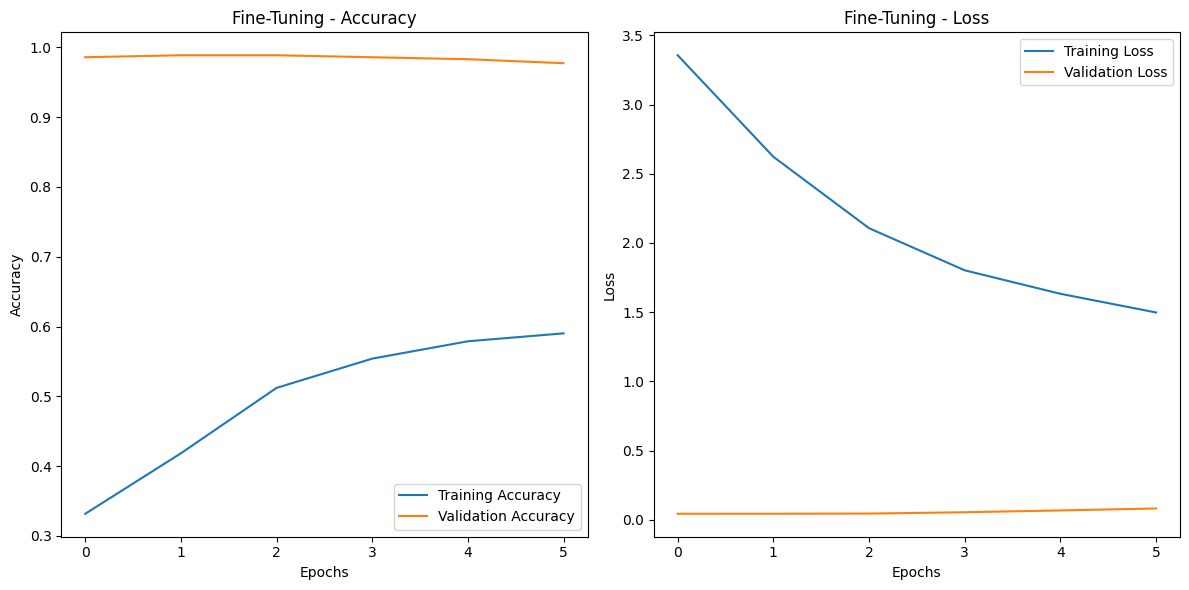


Fine-tuned Model Test Loss: 0.0442
Fine-tuned Model Test Accuracy: 0.9858


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow import Tensor

# Constants
DATA_DIR = r"C:\Users\soume\OneDrive\Documents\PYTHON FILE\DATA SET G"
IMAGE_SIZE = 64  # Resize images to 64x64

# Step 1: Load and preprocess the data
def load_data():
    images, labels = [], []
    gesture_dirs = sorted(os.listdir(DATA_DIR))  # Ensure consistent label assignment
    NUM_CLASSES = len(gesture_dirs)  # Dynamically adjust number of classes
    for label, gesture_dir in enumerate(gesture_dirs):
        gesture_path = os.path.join(DATA_DIR, gesture_dir)
        if os.path.isdir(gesture_path):  # Check if it's a directory
            for filename in os.listdir(gesture_path):
                if filename.endswith(".jpg"):
                    img_path = os.path.join(gesture_path, filename)
                    img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load as RGB
                    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))  # Resize image
                    images.append(img)
                    labels.append(label)
    images = np.array(images, dtype=np.float32)  # Convert to float32 for normalization
    labels = np.array(labels)
    return images, labels, NUM_CLASSES

# Step 2: Build the MobileNetV2 model
def build_mobilenet_model(num_classes, trainable_base=False, learning_rate=0.001):
    base_model = MobileNetV2(
        weights='imagenet',  # Use pretrained weights
        include_top=False,   # Exclude the top layer
        input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)  # Input shape
    )
    base_model.trainable = trainable_base  # Set base layers trainability

    # Add custom classification layers
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),  # Replace Flatten with GAP for better generalization
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 3: Train the model
def train_model(model, X_train, y_train, X_test, y_test, epochs, data_gen, callbacks):
    history = model.fit(
        data_gen.flow(X_train, y_train, batch_size=32),
        epochs=epochs,
        validation_data=(X_test, y_test),
        callbacks=callbacks
    )
    return history

# Step 4: Plot training history
def plot_training_history(history, title="Training History"):
    plt.figure(figsize=(12, 6))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Load and preprocess the data
images, labels, NUM_CLASSES = load_data()
images = images / 255.0  # Normalize pixel values to [0, 1]
labels = to_categorical(labels, NUM_CLASSES)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
data_gen.fit(X_train)

# Callbacks for early stopping and learning rate adjustment
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
callbacks = [early_stopping, reduce_lr]

# Step 5: Initial training
print("Training the initial model...")
initial_model = build_mobilenet_model(NUM_CLASSES, trainable_base=False, learning_rate=0.001)
history_initial = train_model(initial_model, X_train, y_train, X_test, y_test, epochs=20, data_gen=data_gen, callbacks=callbacks)
initial_model.save("gesture_mobilenet_model.h5")
print("Initial model saved as gesture_mobilenet_model.h5")

# Plot the initial training history
plot_training_history(history_initial, title="Initial Training")

# Step 6: Fine-tuning
print("\nFine-tuning the model...")
initial_model.layers[0].trainable = True  # Unfreeze the base model layers
initial_model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_finetune = train_model(initial_model, X_train, y_train, X_test, y_test, epochs=10, data_gen=data_gen, callbacks=callbacks)
initial_model.save("gesture_mobilenet_finetuned_model.h5")
print("Fine-tuned model saved as gesture_mobilenet_finetuned_model.h5")

# Plot the fine-tuning history
plot_training_history(history_finetune, title="Fine-Tuning")

# Evaluate the fine-tuned model
test_loss, test_accuracy = initial_model.evaluate(X_test, y_test, verbose=0)
print(f"\nFine-tuned Model Test Loss: {test_loss:.4f}")
print(f"Fine-tuned Model Test Accuracy: {test_accuracy:.4f}")


In [9]:
import os
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

# Check if the model file exists
MODEL_PATH = r"C:\Users\soume\OneDrive\Documents\WORK M\Pratice\gesture_mobilenet_finetuned_model.h5"
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model file not found at: {MODEL_PATH}")

try:
    # Load the fine-tuned model
    model = load_model(MODEL_PATH)
except OSError as e:
    raise OSError(f"Failed to load model from {MODEL_PATH}. Ensure the file is valid.") from e

IMAGE_SIZE = 64  # Size used during training
GESTURE_CLASSES = ['0', '1', '2', '3', '4', '5', 'THANK YOU', 'PLEASE', 'NICE', 'SORRY', 'HELLO']

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Real-time gesture recognition
def main():
    cap = cv2.VideoCapture(0)  # Open webcam
    if not cap.isOpened():
        print("Error: Cannot access webcam.")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Flip the frame horizontally for a mirror view
        frame = cv2.flip(frame, 1)
        h, w, c = frame.shape

        # Convert the frame to RGB for MediaPipe
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(rgb_frame)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw hand landmarks
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                # Get bounding box of hand
                x_min, y_min, x_max, y_max = get_hand_bbox(hand_landmarks, w, h)
                hand_roi = frame[y_min:y_max, x_min:x_max]

                # Preprocess the hand region for the model
                try:
                    hand_roi_resized = cv2.resize(hand_roi, (IMAGE_SIZE, IMAGE_SIZE))
                    hand_roi_normalized = hand_roi_resized / 255.0
                    hand_roi_expanded = np.expand_dims(hand_roi_normalized, axis=0)

                    # Predict the gesture
                    prediction = model.predict(hand_roi_expanded, verbose=0)
                    gesture_index = np.argmax(prediction)
                    gesture_name = GESTURE_CLASSES[gesture_index]

                    # Display the prediction
                    cv2.putText(
                        frame, f'Gesture: {gesture_name}', 
                        (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, (0, 255, 0), 2, cv2.LINE_AA
                    )
                except Exception as e:
                    print(f"Error during prediction: {e}")

        # Show the frame
        cv2.imshow("Real-Time Gesture Recognition", frame)

        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Helper function to get the bounding box of the hand
def get_hand_bbox(landmarks, frame_width, frame_height):
    x_coords = [landmark.x for landmark in landmarks.landmark]
    y_coords = [landmark.y for landmark in landmarks.landmark]
    x_min = int(min(x_coords) * frame_width)
    y_min = int(min(y_coords) * frame_height)
    x_max = int(max(x_coords) * frame_width)
    y_max = int(max(y_coords) * frame_height)
    return max(0, x_min), max(0, y_min), min(frame_width, x_max), min(frame_height, y_max)

if __name__ == "__main__":
    main()


In [8]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paths
model_path = r"C:\Users\soume\OneDrive\Documents\PYTHON FILE\Final Gesture.ipynb\gesture_mobilenet_finetuned_model.h5"  # Update with your model's path
test_data_dir = r"C:\Users\soume\OneDrive\Documents\PYTHON FILE\DATA SET G"  # Update with your test directory path
input_size = (224, 224)  # Adjust to your model's expected input size

# Load the trained model
model = load_model(model_path)

# Data preprocessing
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_size,
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Predict on the test data
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot metrics (Precision, Recall, F1-Score)
metrics = ["precision", "recall", "f1-score"]
df_metrics = df_report.loc[class_labels, metrics]

plt.figure(figsize=(12, 6))
df_metrics.plot(kind="bar", figsize=(12, 6), edgecolor="k", colormap="viridis")
plt.title("Classification Metrics by Class")
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]  # Normalize

plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


ValueError: Unrecognized keyword arguments: ['batch_shape']